In [136]:
# Import the Dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import seaborn as sns
from datetime import datetime
from scipy.stats import linregress

# Adding config.py file
from config import wkey

# Adding citipy
from citipy import citipy

# Output .csv File
output_data_file = 'Resources/cities.csv'

# Range of latitudes and longitudes for randomization
lat_range = (-90, 90)
lng_range = (-180, 180)

In [137]:
# Generate empty latitudes & Longitudes for randomization
lat_lng_list = []
cities = []

In [138]:
# Randomize Latitudes and longitudes
latitudes = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
longitudes = np. random.uniform(lng_range[0], lng_range[1], size = 1500) 

# Zip the Latitudes and Longitues as paired tuples / coordinates
lat_lng_list = zip(latitudes, longitudes)

In [139]:
# Identify nearest city for each latitude, longitude zip/combination using citipy, as well as country
for i in lat_lng_list:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    # If the city is unique add to our cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm the count is >500.
print(len(cities))

604


In [140]:
# Perform API calls to check the weather of each city in our list.

# Empty list to populate information and pass to a dataframe, and plot
city_list = []
temps = []
humidity = []
clouds = []
winds = []
lat = []
lng = []
countries = []
date = []

# set url via f-strings literal
units = 'imperial'
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={wkey}&units={units}&q='

In [141]:
# Iterate through cities listed to populate the empty dataframe lists within API requests

# set loop counters
counter = 0
set_counter = 1

for i in cities:
    try:
        response = requests.get(base_url + i.replace(" ","&")).json()
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temps.append(response['main']['temp_max'])
        winds.append(response['wind']['speed'])
        date.append(response['dt'])
        if counter > 48:
            counter = 1
            set_counter += 1
            city_list.append(i)
        else:
            counter += 1
            city_list.append(i)
        print(f"Processing Record # : {counter} of Set {set_counter} | {i}")
    except:
        print("City not found. Skipping request...")
print("------------------------------\nData API Response Complete\n------------------------------")

Processing Record # : 1 of Set 1 | ribeira grande
Processing Record # : 2 of Set 1 | porto nacional
Processing Record # : 3 of Set 1 | gamba
Processing Record # : 4 of Set 1 | hermanus
Processing Record # : 5 of Set 1 | mar del plata
Processing Record # : 6 of Set 1 | zatoka
Processing Record # : 7 of Set 1 | muli
Processing Record # : 8 of Set 1 | waipawa
City not found. Skipping request...
Processing Record # : 9 of Set 1 | barrow
Processing Record # : 10 of Set 1 | arraial do cabo
Processing Record # : 11 of Set 1 | yellowknife
Processing Record # : 12 of Set 1 | hobart
Processing Record # : 13 of Set 1 | kruisfontein
Processing Record # : 14 of Set 1 | denpasar
Processing Record # : 15 of Set 1 | atuona
Processing Record # : 16 of Set 1 | iqaluit
Processing Record # : 17 of Set 1 | ganzhou
Processing Record # : 18 of Set 1 | gaozhou
Processing Record # : 19 of Set 1 | tarakan
Processing Record # : 20 of Set 1 | ushuaia
Processing Record # : 21 of Set 1 | tigil
Processing Record # :

Processing Record # : 23 of Set 4 | wyndham
City not found. Skipping request...
Processing Record # : 24 of Set 4 | tevaitoa
Processing Record # : 25 of Set 4 | souillac
Processing Record # : 26 of Set 4 | lata
Processing Record # : 27 of Set 4 | takapau
Processing Record # : 28 of Set 4 | blagoyevo
City not found. Skipping request...
Processing Record # : 29 of Set 4 | saldanha
Processing Record # : 30 of Set 4 | kalmunai
Processing Record # : 31 of Set 4 | hinton
Processing Record # : 32 of Set 4 | solnechnyy
Processing Record # : 33 of Set 4 | comodoro rivadavia
Processing Record # : 34 of Set 4 | zarubino
Processing Record # : 35 of Set 4 | karpogory
Processing Record # : 36 of Set 4 | ishigaki
Processing Record # : 37 of Set 4 | teeli
Processing Record # : 38 of Set 4 | port alfred
Processing Record # : 39 of Set 4 | bataipora
City not found. Skipping request...
Processing Record # : 40 of Set 4 | terrace
Processing Record # : 41 of Set 4 | san quintin
Processing Record # : 42 of 

Processing Record # : 40 of Set 7 | kuusamo
City not found. Skipping request...
Processing Record # : 41 of Set 7 | bambari
Processing Record # : 42 of Set 7 | salima
Processing Record # : 43 of Set 7 | chikwawa
Processing Record # : 44 of Set 7 | vancouver
Processing Record # : 45 of Set 7 | vestmannaeyjar
Processing Record # : 46 of Set 7 | lagoa
Processing Record # : 47 of Set 7 | kassala
Processing Record # : 48 of Set 7 | opuwo
City not found. Skipping request...
Processing Record # : 49 of Set 7 | kachug
Processing Record # : 1 of Set 8 | sao joao da barra
Processing Record # : 2 of Set 8 | huarmey
Processing Record # : 3 of Set 8 | skawina
Processing Record # : 4 of Set 8 | leningradskiy
Processing Record # : 5 of Set 8 | tautira
Processing Record # : 6 of Set 8 | atherton
Processing Record # : 7 of Set 8 | shenjiamen
Processing Record # : 8 of Set 8 | ismailia
Processing Record # : 9 of Set 8 | armacao dos buzios
Processing Record # : 10 of Set 8 | maple creek
Processing Record

Processing Record # : 8 of Set 11 | hauterive
Processing Record # : 9 of Set 11 | luganville
Processing Record # : 10 of Set 11 | ketchikan
Processing Record # : 11 of Set 11 | severo-yeniseyskiy
Processing Record # : 12 of Set 11 | mandalgovi
Processing Record # : 13 of Set 11 | macamic
Processing Record # : 14 of Set 11 | bella union
City not found. Skipping request...
City not found. Skipping request...
Processing Record # : 15 of Set 11 | codajas
Processing Record # : 16 of Set 11 | krasnoarmeysk
Processing Record # : 17 of Set 11 | ranong
Processing Record # : 18 of Set 11 | bairiki
Processing Record # : 19 of Set 11 | helong
Processing Record # : 20 of Set 11 | novaky
Processing Record # : 21 of Set 11 | biasca
City not found. Skipping request...
Processing Record # : 22 of Set 11 | ponta delgada
Processing Record # : 23 of Set 11 | malacatepec
City not found. Skipping request...
Processing Record # : 24 of Set 11 | koulikoro
Processing Record # : 25 of Set 11 | san marcos
Proces

In [146]:
# Convert Raw Data to a DataFrame
weatherpy_dict = {
    "City":city_list,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":temps,
    "Humidity":humidity,
    "Cloudiness":clouds,
    "Wind Speed":winds,
    "Country":countries,
    "Date":date,   
}

In [147]:
weatherpy_df = pd.DataFrame(weatherpy_dict)

# export to csv
weatherpy_df.to_csv('cities.csv',encoding = 'utf-8',index = False)

weatherpy_df.count()

City          537
Lat           537
Lng           537
Max Temp      537
Humidity      537
Cloudiness    537
Wind Speed    537
Country       537
Date          537
dtype: int64

In [148]:
weatherpy_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,42.7461,-8.4439,56.05,89,75,1.01,ES,1638729734
1,porto nacional,41.1496,-8.6110,52.95,85,40,1.01,PT,1638729596
2,gamba,-2.6500,10.0000,78.64,89,100,5.03,GA,1638729139
3,hermanus,-34.4187,19.2345,63.90,94,100,11.65,ZA,1638729734
4,mar del plata,43.4002,-4.0094,54.01,80,40,11.01,ES,1638729148
5,zatoka,46.0725,30.4654,46.94,91,100,19.15,UA,1638729735
6,muli,2.9167,73.5667,82.89,72,20,17.07,MV,1638729735
7,waipawa,-41.4122,175.5153,53.46,96,100,9.24,NZ,1638729735
8,barrow,71.2906,-156.7887,8.62,72,75,10.36,US,1638729534
9,arraial do cabo,-22.8362,-46.6460,87.21,42,51,6.06,BR,1638729736


In [149]:
# Check for cities with humidity higher than 100%
weatherpy_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.00000,5.370000e+02
mean,21.281239,19.164367,53.203948,71.711359,61.631285,8.06473,1.638730e+09
std,32.542060,89.290367,29.869437,21.964450,39.697245,6.28954,1.636802e+02
min,-54.800000,-179.166700,-46.660000,6.000000,0.000000,0.00000,1.638729e+09
25%,-6.516700,-57.679200,33.220000,61.000000,20.000000,3.56000,1.638730e+09
50%,25.033300,24.530800,62.850000,76.000000,75.000000,6.73000,1.638730e+09
75%,48.711100,90.283300,76.800000,89.000000,100.000000,10.51000,1.638730e+09
max,78.218600,178.416700,101.320000,100.000000,100.000000,48.34000,1.638730e+09


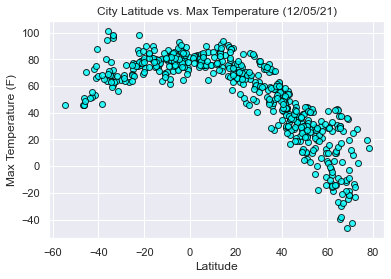

In [186]:
# Temperature vs latitude Time Formatted Scatterplot

plt.scatter(weatherpy_df["Lat"], 
            weatherpy_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities", color = "cyan")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Resources/Latitude vs Temperature (F).png")

### The City Latitude vs. Maximum Temperature scatterplot is analyzing temperature increase and decrease in corrilation to the equator 0˚ latitude. 

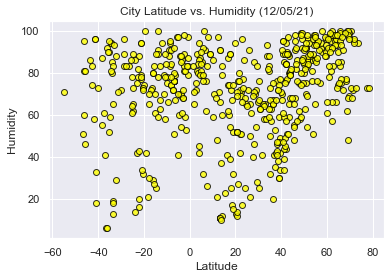

In [174]:
# Humidity vs latitude

plt.scatter(weatherpy_df["Lat"], 
            weatherpy_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities",color = "yellow")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Resources/Latitude vs Humidity.png")

### The City Latitude vs. Humidity scatterplot is analyzing humidity increase and decrease in corrilation to the equator 0˚ latitude. 

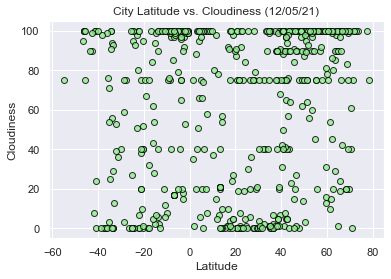

In [181]:
# Cloudiness vs latitude

plt.scatter(weatherpy_df["Lat"], 
            weatherpy_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities",color = 'lightgreen')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Resources/Latitude vs Cloudiness.png")

### The City Latitudes vs. Cloudiness scatterplot does not appear to show a definitive relationship between cloud cover and geolocation. However, there is a higher concentration of cloud cover at the equator, 78, 100 parallels.

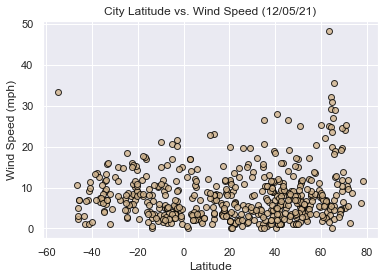

In [185]:
# Wind Speed vs latitude

plt.scatter(weatherpy_df["Lat"], 
            weatherpy_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities",color = 'tan')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Resources/Latitude vs Wind Speed.png")

### The City Latitude vs Wind Speed is analyzing the increase and decrease of wind speed in corrilation to the equator 0˚ latitude. However there is increase wind speed closer to the equator. 

In [154]:
# linear Regression by Hemisphere

#create northern and southern df
north_hemi_df = weatherpy_df.loc[(weatherpy_df['Lat']>0)]
south_hemi_df = weatherpy_df.loc[(weatherpy_df['Lat'] < 0)]

In [155]:
north_hemi_df.count()

City          372
Lat           372
Lng           372
Max Temp      372
Humidity      372
Cloudiness    372
Wind Speed    372
Country       372
Date          372
dtype: int64

In [156]:
 south_hemi_df.count()

City          165
Lat           165
Lng           165
Max Temp      165
Humidity      165
Cloudiness    165
Wind Speed    165
Country       165
Date          165
dtype: int64

In [157]:
# Define Functions For Each Analysis / Parameter
def line_regr(x, y,yaxis):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    y_pred = intercept + slope*x
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x,y)
    plt.plot(x,y_pred,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(yaxis)
    print(f"r-squared: {rvalue}")
    plt.show()

r-squared: -0.8772460840957953


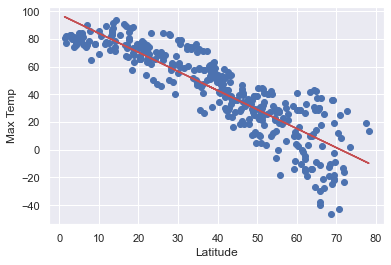

<Figure size 432x288 with 0 Axes>

In [158]:
# Northern Hemisphere - Temperature (F) vs. Latitude
x = north_hemi_df['Lat']
y = north_hemi_df['Max Temp']
line_regr(x,y,'Max Temp')

plt.savefig("Resources/NH_temp_vs_lat.png")

r-squared: 0.5145534705209651


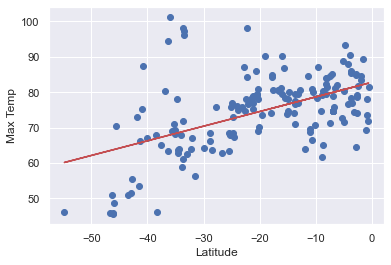

<Figure size 432x288 with 0 Axes>

In [159]:
# Southern Hemisphere - Temperature (F) vs. Latitude
x = south_hemi_df['Lat']
y = south_hemi_df['Max Temp']
line_regr(x,y,'Max Temp')

plt.savefig("Resources/SH_temp_vs_lat.png")

###  The linear regression for each hemisphere directly correlates to temperatures increasing and decreasing based on the cities proximity to the equator.

r-squared: 0.4069665908969346


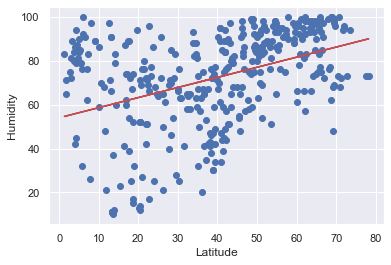

<Figure size 432x288 with 0 Axes>

In [160]:
# Northern Hemisphere - Humidity (%) vs. Latitude 
x = north_hemi_df['Lat']
y = north_hemi_df['Humidity']
line_regr(x,y,'Humidity')

plt.savefig("Resources/NH_hum_vs_lat.png")

r-squared: 0.18227525712952178


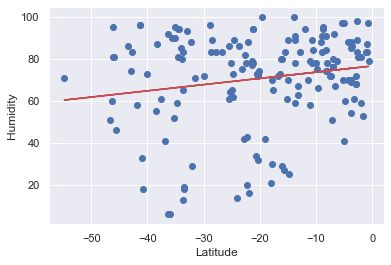

<Figure size 432x288 with 0 Axes>

In [161]:
# Southern Hemisphere - Humidity (%) vs. Latitude 
x = south_hemi_df['Lat']
y = south_hemi_df['Humidity']
line_regr(x,y,'Humidity')

plt.savefig("Resources/SH_hum_vs_lat.png")

### Neither hemisphere display strong correlations between humidity levels and equatorial geolocation. Therefore, scores indicate the line of best fit cannot predict the variability.

r-squared: 0.320411958658492


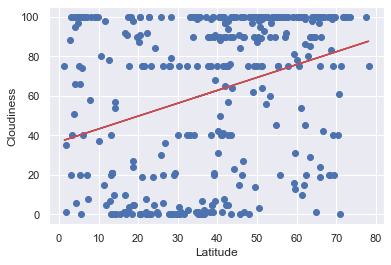

<Figure size 432x288 with 0 Axes>

In [162]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude 
x = north_hemi_df['Lat']
y = north_hemi_df['Cloudiness']
line_regr(x,y,'Cloudiness')

plt.savefig("Resources/NH_cloud_vs_lat.png")

r-squared: 0.1502703168503039


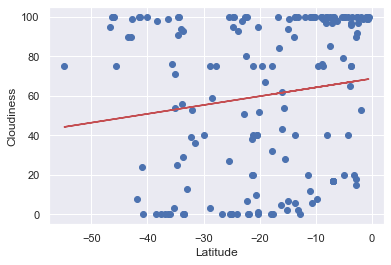

<Figure size 432x288 with 0 Axes>

In [163]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
x = south_hemi_df['Lat']
y = south_hemi_df['Cloudiness']
line_regr(x,y,'Cloudiness')

plt.savefig("Resources/SH_cloud_vs_lat.png")

### Neither hemisphere display strong correlations between cloud cover levels and equatorial geolocation. Scores indicate the line of best fit cannot predict the variability

r-squared: 0.22330874210198262


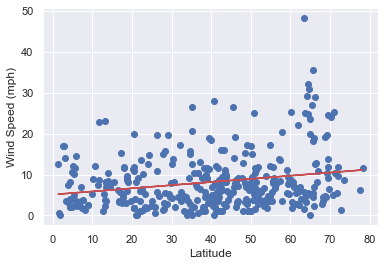

<Figure size 432x288 with 0 Axes>

In [164]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
x = north_hemi_df['Lat']
y = north_hemi_df['Wind Speed']
line_regr(x,y,'Wind Speed (mph)')

plt.savefig("Resources/NH_wind_vs_lat.png")

r-squared: -0.13994517683815286


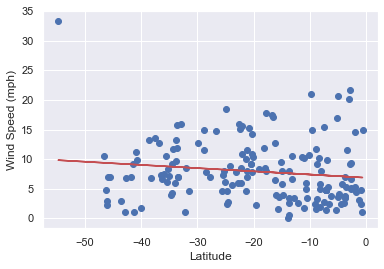

<Figure size 432x288 with 0 Axes>

In [165]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
x = south_hemi_df['Lat']
y = south_hemi_df['Wind Speed']
line_regr(x,y,'Wind Speed (mph)')

plt.savefig("Resources/SH_wind_vs_lat.png")

###  Neither hemisphere display strong correlations between wind speeds and equatorial geolocation. Therefore, scores indicate the line of best fit cannot predict the variability.